In [1]:
using Plots
using HDF5
using Distributed
pyplot()

Plots.PyPlotBackend()

In [2]:
input_name="thirty_states"

"thirty_states"

In [3]:
cd("..")
println(pwd())

/home/nacho/Dropbox/Codes/MQC


In [4]:
include("./Initial_data/$(input_name).jl")
filename="./data/K_$(potname)_R0($R0)/K_SIMULATION.h5"

┌ Info: Recompiling stale cache file /home/nacho/.julia/compiled/v1.1/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1184
┌ Warning: Package Distributions does not have Test in its dependencies:
│ - If you have Distributions checked out for development and have
│   added Test as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Distributions
└ Loading Test into Distributions from project dependency, future warnings for Distributions are suppressed.


"./data/K_thirty_states_R0(1)/K_SIMULATION.h5"

In [ ]:
############################# ENTER INFO
cd("..")
potname="thirty_states"
R0=1
K=20:5:50
dir_name="./data/K_"*potname*"_R0($R0)"
DYN_LIST=["EH","FSSH","SHEEP","CM2","CM3","CM2_FSSH","CM3_FSSH"]
mass = 2000
nsts=30
Ntrajs=100

##AUTOMATIC STUFF
filename=dir_name*"/K_SIMULATION.h5"
include("data_functions.jl")
include("potentials.jl")
include("types.jl")

In [5]:
###### META_DICT SHOWS WHAT'S SAVED INSIDE file
meta_string=h5read(filename,"META_DICT")
META_DICT=eval(Meta.parse(meta_string))


@show META_DICT

META_DICT = Dict{Any,Any}("FR_SHEEP"=>"[Ntrajs,Ksize,NDOFs]","FP_EH"=>"[Ksize,NDOFs]","FR_CM2_FSSH_FRIC"=>"[Ntrajs,Ksize,NDOFs]","FP_SHEEP"=>"[Ntrajs,Ksize,NDOFs]","FR_FSSH"=>"[Ntrajs,Ksize,NDOFs]","Fpop_SHEEP"=>"[Ntrajs,Ksize,electronic_states]","Fast_CM2_FSSH_FRIC"=>"[Ntrajs,Ksize]","Fpop_EH"=>"[Ksize,electronic_states]","Fast_FSSH"=>"[Ntrajs,Ksize]","FR_EH"=>"[Ksize,NDOFs]","FP_CM2_FSSH_FRIC"=>"[Ntrajs,Ksize,NDOFs]","Fast_SHEEP"=>"[Ntrajs,Ksize]","Fpop_FSSH"=>"[Ntrajs,Ksize,electronic_states]","FP_FSSH"=>"[Ntrajs,Ksize,NDOFs]","Fpop_CM2_FSSH_FRIC"=>"[Ntrajs,Ksize,electronic_states]")


Dict{Any,Any} with 15 entries:
  "FR_SHEEP"           => "[Ntrajs,Ksize,NDOFs]"
  "FP_EH"              => "[Ksize,NDOFs]"
  "FR_CM2_FSSH_FRIC"   => "[Ntrajs,Ksize,NDOFs]"
  "FP_SHEEP"           => "[Ntrajs,Ksize,NDOFs]"
  "FR_FSSH"            => "[Ntrajs,Ksize,NDOFs]"
  "Fpop_SHEEP"         => "[Ntrajs,Ksize,electronic_states]"
  "Fast_CM2_FSSH_FRIC" => "[Ntrajs,Ksize]"
  "Fpop_EH"            => "[Ksize,electronic_states]"
  "Fast_FSSH"          => "[Ntrajs,Ksize]"
  "FR_EH"              => "[Ksize,NDOFs]"
  "FP_CM2_FSSH_FRIC"   => "[Ntrajs,Ksize,NDOFs]"
  "Fast_SHEEP"         => "[Ntrajs,Ksize]"
  "Fpop_FSSH"          => "[Ntrajs,Ksize,electronic_states]"
  "FP_FSSH"            => "[Ntrajs,Ksize,NDOFs]"
  "Fpop_CM2_FSSH_FRIC" => "[Ntrajs,Ksize,electronic_states]"

In [15]:
Ntrajs=200

200

In [7]:
DYN_LIST[4]

"CMFSH"

In [8]:
FR_CMFSH=h5read(filename,"FR_CM2_FSSH_FRIC")
Fast_CMFSH=h5read(filename,"Fast_CM2_FSSH_FRIC");

In [9]:
######## LOAD SAVE FILES
for DYN in DYN_LIST
    A_string="A_$(DYN)=general_K_read(filename,$(DYN))"
    R_string="FR_$(DYN)=A_$(DYN)[1]"
    P_string="FP_$(DYN)=A_$(DYN)[2]"
    eval(Meta.parse(A_string))
    eval(Meta.parse(R_string))
    eval(Meta.parse(P_string))
    if DYN in MF_LIST || DYN in SH_LIST
        pop_string="Fpop_$(DYN)=A_$(DYN)[3]"
        eval(Meta.parse(pop_string))
        if DYN in SH_LIST
            ast_string="Fast_$(DYN)=A_$(DYN)[4]"
            eval(Meta.parse(ast_string))
        end
    end
end

In [10]:
function GS_SH_prob(K,Fast)
    GS_PROB=zeros(size(K))
    for k in 1:length(K)
        for traj in 1:Ntrajs
            if Fast[traj,k]==1
                GS_PROB[k]+=1
            end
        end
    end

    return GS_PROB./Ntrajs
end

GS_SH_prob (generic function with 1 method)

In [25]:
COLORS=[:black,:blue,:red,:cyan]

4-element Array{Symbol,1}:
 :black
 :blue 
 :red  
 :cyan 

In [17]:
using Plots.PlotMeasures

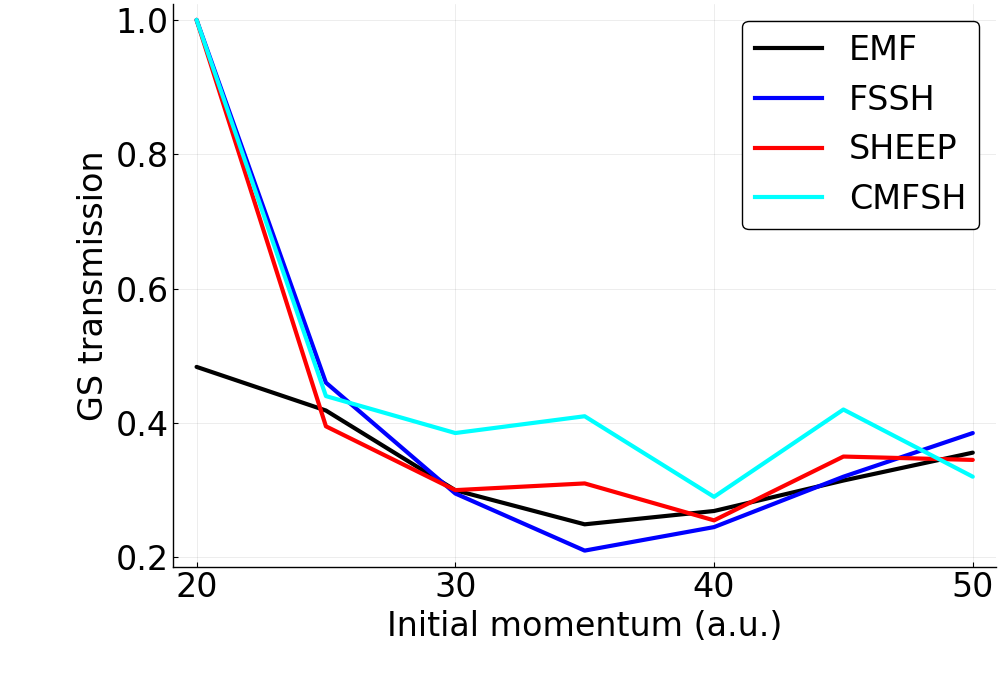

In [26]:
########### GROUND STATE PLOTTER. PLOTS FINAL GS POPULATIONS FOR DYNAMICS IN DYN_LIST
P=plot()
for (i,DYN) in enumerate(DYN_LIST)
    if DYN in MF_LIST
        GS_string="GS_$(DYN)=GS_MF_prob(K,Fpop_$(DYN))"
        eval(Meta.parse(GS_string))
        #plt_string="plot!(K,GS_$(DYN),label=$(DYN),line=3)"
        plt_string="""plot!(K,GS_$(DYN),label="EMF",line=3,color=COLORS[$i])"""
        eval(Meta.parse(plt_string))
    elseif DYN in SH_LIST
        GS_string="GS_$(DYN)=GS_SH_prob(K,Fast_$(DYN))"
        eval(Meta.parse(GS_string))
        plt_string="plot!(K,GS_$(DYN),label=$(DYN),line=3,color=COLORS[$i])"
        eval(Meta.parse(plt_string))
    else
        println("$DYN doesn't have GS info, won't plot")
    end
end
GUIDEFONT=font(24,"Helvetica")
TICKFONT=font(24,"Helvetica")
L_MARG=[20mm 0mm]
B_MARG=[15mm 0mm]
SIZE=[1000,700]
plot!(left_margin=L_MARG,bottom_margin=B_MARG,size=SIZE)
plot!(xguidefont = GUIDEFONT,xtickfont=TICKFONT,yguidefont = GUIDEFONT,ytickfont=TICKFONT,legend=:best)
plot!(legendfont=GUIDEFONT, xlabel="Initial momentum (a.u.)", ylabel="GS transmission")

P

In [ ]:
####### STATE TRANSMISSION PLOTS
#cond(R,P) is a function that gives true if R and P are within some condition of interest for the plot, otherwise false
cond(R,P)=R[1]>0

SH_eval=true #MAKE TRUE FOR EVALUATING SH DYNAMICS WITH RESPECT TO AST STATES, FALSE FOR EVALUATION ACCORDING TO MF PROBS

P=plot()
for DYN in DYN_LIST
    dyn_sts=eval(Meta.parse("$(DYN)_sts"))
    if DYN in MF_LIST
        M_string="MULTI_$(DYN)=multi_MF_prob(K,A_$(DYN),1:$dyn_sts,cond)"
        eval(Meta.parse(M_string))
        for st in 1:nsts
            plt_string="""plot!(K,MULTI_$(DYN)[:,$st],label="$(DYN)_st=$st")"""
            eval(Meta.parse(plt_string))
        end
    elseif DYN in SH_LIST
        if SH_eval==true
            M_string="MULTI_$(DYN)=multi_SH_prob(K,A_$(DYN),1:$dyn_sts,cond)"
            eval(Meta.parse(M_string))
            for st in 1:nsts
                plt_string="""plot!(K,MULTI_$(DYN)[:,$st],label="$(DYN)_st=$st")"""
                eval(Meta.parse(plt_string))
            end
        else
            M_string="MULTI_$(DYN)=multi_MF_prob(K,A_$(DYN),1:$dyn_sts,cond)"
            eval(Meta.parse(M_string))
            for st in 1:nsts
                plt_string="""plot!(K,MULTI_$(DYN)[:,$st],label="$(DYN)_st=$st")"""
                eval(Meta.parse(plt_string))
            end
        end
    else
        println("$DYN doesn't have electronic states info, won't plot")
    end
end

P

In [ ]:
####### STATE REFLECTION PLOTS
#cond(R,P) is a function that gives true if R and P are within some condition of interest for the plot, otherwise false
cond(R,P)=R[1]<0

SH_eval=true #MAKE TRUE FOR EVALUATING SH DYNAMICS WITH RESPECT TO AST STATES, FALSE FOR EVALUATION ACCORDING TO MF PROBS

P=plot()
for DYN in DYN_LIST
    dyn_sts=eval(Meta.parse("$(DYN)_sts"))
    if DYN in MF_LIST
        M_string="MULTI_$(DYN)=multi_MF_prob(K,A_$(DYN),1:$dyn_sts,cond)"
        eval(Meta.parse(M_string))
        for st in 1:nsts
            plt_string="""plot!(K,MULTI_$(DYN)[:,$st],label="$(DYN)_st=$st")"""
            eval(Meta.parse(plt_string))
        end
    elseif DYN in SH_LIST
        if SH_eval==true
            M_string="MULTI_$(DYN)=multi_SH_prob(K,A_$(DYN),1:$dyn_sts,cond)"
            eval(Meta.parse(M_string))
            for st in 1:nsts
                plt_string="""plot!(K,MULTI_$(DYN)[:,$st],label="$(DYN)_st=$st")"""
                eval(Meta.parse(plt_string))
            end
        else
            M_string="MULTI_$(DYN)=multi_MF_prob(K,A_$(DYN),1:$dyn_sts,cond)"
            eval(Meta.parse(M_string))
            for st in 1:nsts
                plt_string="""plot!(K,MULTI_$(DYN)[:,$st],label="$(DYN)_st=$st")"""
                eval(Meta.parse(plt_string))
            end
        end
    else
        println("$DYN doesn't have electronic states info, won't plot")
    end
end

P